# Merging DataFrames & Series

## pd.concat( ) with Series

In [1]:
import pandas as pd

In [ ]:
s1 = pd.Series(['a', 'b', 'c'])
s2 = pd.Series(['d', 'e', 'f', 'z'])

In [82]:
pd.concat([s1,s2])

0    a
1    b
2    c
0    d
1    e
2    f
3    z
dtype: object

In [83]:
pd.concat([s2, s1])

0    d
1    e
2    f
3    z
0    a
1    b
2    c
dtype: object

In [84]:
pd.concat([s2, s1], ignore_index=True)

0    d
1    e
2    f
3    z
4    a
5    b
6    c
dtype: object

In [89]:
nums = pd.Series([65,69,99,23,56,54])
nums2 = pd.Series([11,111,1111])

In [88]:
pd.concat([s2, s1, nums], ignore_index=True)

0      d
1      e
2      f
3      z
4      a
5      b
6      c
7     65
8     69
9     99
10    23
11    56
12    54
dtype: object

In [91]:
pd.concat([nums, nums2, s1], ignore_index=True)

0       65
1       69
2       99
3       23
4       56
5       54
6       11
7      111
8     1111
9        a
10       b
11       c
dtype: object

## pd.concat( ) with Series by Index

In [107]:
c1 = pd.Series(["red", "orange", "yellow"])
c2 = pd.Series(["green", "blue", "purple"])

In [110]:
pd.concat([c1,c2])

0       red
1    orange
2    yellow
0     green
1      blue
2    purple
dtype: object

In [112]:
pd.concat([c1,c2], axis=1)

,0,1
0,red,green
1,orange,blue
2,yellow,purple


In [113]:
fruits = pd.Series(
    data=["apple", "banana", "cherry"], 
    index=["a","b", "c"]
)

animals = pd.Series(
    data=["badger", "cougar", "anaconda"], 
    index=["b", "c", "a"]
)

In [114]:
fruits

a     apple
b    banana
c    cherry
dtype: object

In [115]:
animals

b      badger
c      cougar
a    anaconda
dtype: object

In [117]:
pd.concat([fruits, animals], axis=1)

,0,1
a,apple,anaconda
b,banana,badger
c,cherry,cougar


In [118]:
pd.concat([fruits, animals], axis=1, keys=["fruit", "animal"])

,fruit,animal
a,apple,anaconda
b,banana,badger
c,cherry,cougar


In [119]:
pd.concat([fruits, animals], axis=0, keys=["fruit", "animal"])

fruit   a       apple
        b      banana
        c      cherry
animal  b      badger
        c      cougar
        a    anaconda
dtype: object

## pd.concat( ) with DataFrames

In [120]:
fruits = pd.Series(
    data=["apple", "banana", "cherry", "durian"], 
    index=["a","b", "c", "d"]
)

animals = pd.Series(
    data=["badger", "cougar", "anaconda", "elk", "pika"], 
    index=["b", "c", "a", "e", "p"]
)

In [123]:
pd.concat([animals, fruits], ignore_index=True)

0      badger
1      cougar
2    anaconda
3         elk
4        pika
5       apple
6      banana
7      cherry
8      durian
dtype: object

In [124]:
pd.concat([animals, fruits], axis=1)

,0,1
b,badger,banana
c,cougar,cherry
a,anaconda,apple
e,elk,NaN
p,pika,NaN
d,NaN,durian


In [126]:
pd.concat([animals, fruits], axis=1, join="inner")

,0,1
b,badger,banana
c,cougar,cherry
a,anaconda,apple


In [139]:
harvest_21 = pd.DataFrame(
    [['potatoes', 900], ['garlic', 1350], ['onions', 875]], 
    columns=['crop', 'qty']
)

harvest_22 = pd.DataFrame(
    [['garlic', 1600], ['spinach', 560], ['turnips', 999], ['onions', 1000]], 
    columns=['crop', 'qty']
)

In [132]:
harvest_21

,crop,qty
0,potatoes,900
1,garlic,1350
2,onions,875


In [133]:
harvest_22

,crop,qty
0,garlic,1600
1,spinach,560
2,turnips,999
3,onions,1000


In [135]:
pd.concat([harvest_21, harvest_22], ignore_index=True)

,crop,qty
0,potatoes,900
1,garlic,1350
2,onions,875
3,garlic,1600
4,spinach,560
5,turnips,999
6,onions,1000


In [136]:
pd.concat([harvest_21, harvest_22], keys=[2021, 2022])

crop   qty
2021 0  potatoes   900
     1    garlic  1350
     2    onions   875
2022 0    garlic  1600
     1   spinach   560
     2   turnips   999
     3    onions  1000

In [138]:
harvest_23 = pd.DataFrame(
    [['potatoes', 900, 500], ['garlic', 1350, 1200], ['onions', 875, 950]], 
    columns=['crop', 'qty', 'profit']
)

In [145]:
pd.concat([harvest_21, harvest_22, harvest_23])

,crop,qty,profit
0,potatoes,900,NaN
1,garlic,1350,NaN
2,onions,875,NaN
0,garlic,1600,NaN
1,spinach,560,NaN
2,turnips,999,NaN
3,onions,1000,NaN
0,potatoes,900,500.0
1,garlic,1350,1200.0
2,onions,875,950.0


In [144]:
pd.concat([harvest_21, harvest_22, harvest_23], join="inner")

,crop,qty
0,potatoes,900
1,garlic,1350
2,onions,875
0,garlic,1600
1,spinach,560
2,turnips,999
3,onions,1000
0,potatoes,900
1,garlic,1350
2,onions,875


In [151]:
livestock = pd.DataFrame(
    [['pasture', 9], ['stable', 3], ['coop', 34]], 
    columns=['location', 'qty'],
    index=['alpaca', 'horse', 'chicken']
)
weights = pd.DataFrame(
    [[4,10], [900, 2000], [1.2, 4], [110, 150]], 
    columns=['min_weight', 'max_weight'],
    index=['chicken', 'horse', 'duck', 'alpaca']
)

In [156]:
livestock

,location,qty
alpaca,pasture,9
horse,stable,3
chicken,coop,34


In [157]:
weights

,min_weight,max_weight
chicken,4.0,10
horse,900.0,2000
duck,1.2,4
alpaca,110.0,150


In [158]:
pd.concat([livestock, weights])

,location,qty,min_weight,max_weight
alpaca,pasture,9.0,NaN,NaN
horse,stable,3.0,NaN,NaN
chicken,coop,34.0,NaN,NaN
chicken,NaN,NaN,4.0,10.0
horse,NaN,NaN,900.0,2000.0
duck,NaN,NaN,1.2,4.0
alpaca,NaN,NaN,110.0,150.0


In [159]:
pd.concat([livestock, weights], axis=1)

,location,qty,min_weight,max_weight
alpaca,pasture,9.0,110.0,150
horse,stable,3.0,900.0,2000
chicken,coop,34.0,4.0,10
duck,NaN,NaN,1.2,4


In [160]:
pd.concat([livestock, weights], axis=1, join="inner")

,location,qty,min_weight,max_weight
alpaca,pasture,9,110.0,150
horse,stable,3,900.0,2000
chicken,coop,34,4.0,10


## Combining DataFrames With Merge

In [162]:
teams = pd.DataFrame(
    [
        ["Suns", "Phoenix", 20, 4], 
        ["Mavericks", "Dallas", 11,12], 
        ["Rockets", "Houston", 7, 16],
        ['Nuggets', "Denver", 11, 12]
    ], 
    columns=["team", "city", "wins", "losses"]
)

In [161]:
cities = pd.DataFrame(
    [
        ["Houston", "Texas", 2310000], 
        ["Phoenix", "Arizona", 1630000], 
        ["San Diego", "California", 1410000],
        ["Dallas", "Texas", 1310000]
    ],
    columns=["city", "state", "population"]
)

In [163]:
teams

,team,city,wins,losses
0,Suns,Phoenix,20,4
1,Mavericks,Dallas,11,12
2,Rockets,Houston,7,16
3,Nuggets,Denver,11,12


In [164]:
cities

,city,state,population
0,Houston,Texas,2310000
1,Phoenix,Arizona,1630000
2,San Diego,California,1410000
3,Dallas,Texas,1310000


In [165]:
teams.merge(cities)

,team,city,wins,losses,state,population
0,Suns,Phoenix,20,4,Arizona,1630000
1,Mavericks,Dallas,11,12,Texas,1310000
2,Rockets,Houston,7,16,Texas,2310000


In [166]:
teams.merge(cities, on="city")

,team,city,wins,losses,state,population
0,Suns,Phoenix,20,4,Arizona,1630000
1,Mavericks,Dallas,11,12,Texas,1310000
2,Rockets,Houston,7,16,Texas,2310000


In [167]:
teams.merge(cities, on="city", how="inner")

,team,city,wins,losses,state,population
0,Suns,Phoenix,20,4,Arizona,1630000
1,Mavericks,Dallas,11,12,Texas,1310000
2,Rockets,Houston,7,16,Texas,2310000


In [168]:
teams.merge(cities, how="left")

,team,city,wins,losses,state,population
0,Suns,Phoenix,20,4,Arizona,1630000.0
1,Mavericks,Dallas,11,12,Texas,1310000.0
2,Rockets,Houston,7,16,Texas,2310000.0
3,Nuggets,Denver,11,12,NaN,NaN


In [169]:
teams.merge(cities, how="right")

,team,city,wins,losses,state,population
0,Rockets,Houston,7.0,16.0,Texas,2310000
1,Suns,Phoenix,20.0,4.0,Arizona,1630000
2,NaN,San Diego,NaN,NaN,California,1410000
3,Mavericks,Dallas,11.0,12.0,Texas,1310000


In [170]:
teams.merge(cities, how="outer")

,team,city,wins,losses,state,population
0,Suns,Phoenix,20.0,4.0,Arizona,1630000.0
1,Mavericks,Dallas,11.0,12.0,Texas,1310000.0
2,Rockets,Houston,7.0,16.0,Texas,2310000.0
3,Nuggets,Denver,11.0,12.0,NaN,NaN
4,NaN,San Diego,NaN,NaN,California,1410000.0


In [171]:
cities.merge(teams, on="city", how="left")

,city,state,population,team,wins,losses
0,Houston,Texas,2310000,Rockets,7.0,16.0
1,Phoenix,Arizona,1630000,Suns,20.0,4.0
2,San Diego,California,1410000,NaN,NaN,NaN
3,Dallas,Texas,1310000,Mavericks,11.0,12.0


In [172]:
teams.merge(cities, on="city", how="right")

,team,city,wins,losses,state,population
0,Rockets,Houston,7.0,16.0,Texas,2310000
1,Suns,Phoenix,20.0,4.0,Arizona,1630000
2,NaN,San Diego,NaN,NaN,California,1410000
3,Mavericks,Dallas,11.0,12.0,Texas,1310000


In [178]:
midterms = pd.DataFrame(
    [['alex', 'padilla', 92], ['rayna', 'wilson', 83], ['juan', 'gomez', 78], ['angela', 'smith', 66],['stephen', 'yu', 98]], 
    columns=['first', 'last', 'score']
)
finals = pd.DataFrame(
    [['alex','padilla', 97, False], ['rayna', 'wilson', 88, False], ['alex', 'smith', 86, True], ['juan', 'gomez', 71, True], ['stephen', 'yu', 78, False], ['sakura', 'steel', 100, True]], 
    columns=['first', 'last','score', 'extra_credit']
)


In [179]:
midterms

,first,last,score
0,alex,padilla,92
1,rayna,wilson,83
2,juan,gomez,78
3,angela,smith,66
4,stephen,yu,98


In [180]:
finals

,first,last,score,extra_credit
0,alex,padilla,97,False
1,rayna,wilson,88,False
2,alex,smith,86,True
3,juan,gomez,71,True
4,stephen,yu,78,False
5,sakura,steel,100,True


In [181]:
midterms.merge(finals, on="score")

,first_x,last_x,score,first_y,last_y,extra_credit
0,juan,gomez,78,stephen,yu,False


In [182]:
midterms.merge(finals, on="first")

,first,last_x,score_x,last_y,score_y,extra_credit
0,alex,padilla,92,padilla,97,False
1,alex,padilla,92,smith,86,True
2,rayna,wilson,83,wilson,88,False
3,juan,gomez,78,gomez,71,True
4,stephen,yu,98,yu,78,False


In [184]:
midterms.merge(finals, on=["first", "last"], how="inner")

,first,last,score_x,score_y,extra_credit
0,alex,padilla,92,97,False
1,rayna,wilson,83,88,False
2,juan,gomez,78,71,True
3,stephen,yu,98,78,False


In [185]:
midterms.merge(finals, on=["first", "last"], how="inner", suffixes=("_midterms", "_finals"))

,first,last,score_midterms,score_finals,extra_credit
0,alex,padilla,92,97,False
1,rayna,wilson,83,88,False
2,juan,gomez,78,71,True
3,stephen,yu,98,78,False


In [187]:
combo = midterms.merge(finals, on=["first", "last"], how="inner", suffixes=("_m", "_f"))

In [188]:
combo["avg"] = (combo["score_m"] + combo["score_f"])/2

In [189]:
combo

,first,last,score_m,score_f,extra_credit,avg
0,alex,padilla,92,97,False,94.5
1,rayna,wilson,83,88,False,85.5
2,juan,gomez,78,71,True,74.5
3,stephen,yu,98,78,False,88.0


In [195]:
combo.loc[combo["extra_credit"] == True, 'avg'] += 5

In [196]:
combo

,first,last,score_m,score_f,extra_credit,avg
0,alex,padilla,92,97,False,94.5
1,rayna,wilson,83,88,False,85.5
2,juan,gomez,78,71,True,79.5
3,stephen,yu,98,78,False,88.0


## UFOS + State Pops Example

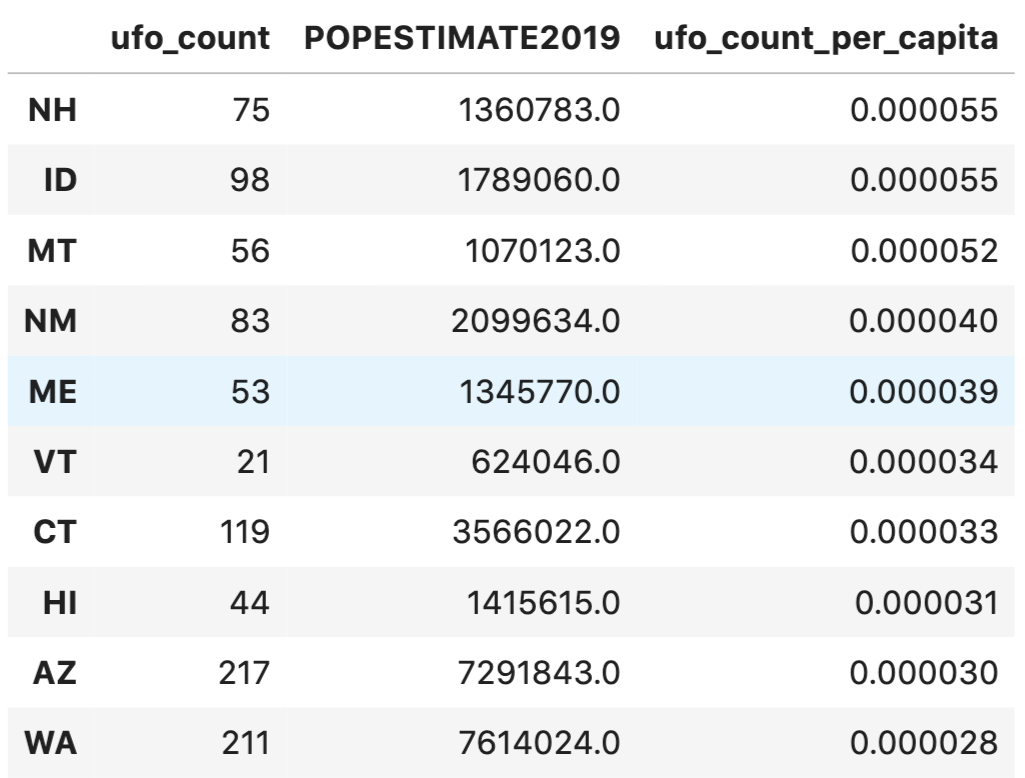

In [200]:
ufos = pd.read_csv("data/nuforc_reports.csv", parse_dates=["date_time"])

In [201]:
ufos

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaT,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15 18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
88120,4 lights in formation over Tempe appear while ...,Tempe,AZ,2019-10-02 20:00:00,formation,3 minutes,Occurred : 10/2/2019 20:00 (Entered as : 10/2...,http://www.nuforc.org/webreports/149/S149463.html,4 lights in formation over Tempe appear while ...,2019-10-04T00:00:00,33.414036,-111.920920
88121,"2 bright star like lights in the NNW skys, ((...",Bolivar,MO,2019-10-02 20:00:00,light,20 seconds,Occurred : 10/2/2019 20:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149405.html,2 bright star like lights in the NNW sky two b...,2019-10-04T00:00:00,37.642200,-93.399600
88122,I just witnessed a ‘Phoenix Lights’ type of fo...,North Port,FL,2019-10-02 20:03:00,formation,20 seconds,Occurred : 10/2/2019 20:03 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149424.html,10/2/19 @ 8:03PM EST UFO SIGHTING in the 3428...,2019-10-04T00:00:00,27.076210,-82.223280
88123,"Witnessed an orange, slow moving light. Was lo...",Black Mountain,NC,2019-10-02 22:00:00,fireball,2 minutes,Occurred : 10/2/2019 22:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149447.html,"Witnessed an orange, slow moving light. Was lo...",2019-10-04T00:00:00,35.605000,-82.313200


In [209]:
ufos_19 = ufos[ufos["date_time"].dt.year == 2019]

In [213]:
ufos_19

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
5,"The object has flashing lights that are green,...",Kirbyville,TX,2019-04-02 20:25:00,disk,15 minutes,Occurred : 4/2/2019 20:25 (Entered as : 04/02...,http://www.nuforc.org/webreports/145/S145476.html,"The object has flashing lights that are green,...",2019-04-08T00:00:00,30.677200,-94.005200
6,Description is the same as Washington DC event...,Tucson,AZ,2019-05-01 11:00:00,unknown,5 minutes,Occurred : 5/1/2019 11:00 (Entered as : 5/1/1...,http://www.nuforc.org/webreports/145/S145947.html,"Description is the same as Washington, DC, eve...",2019-05-09T00:00:00,32.259941,-110.927542
...,...,...,...,...,...,...,...,...,...,...,...,...
88120,4 lights in formation over Tempe appear while ...,Tempe,AZ,2019-10-02 20:00:00,formation,3 minutes,Occurred : 10/2/2019 20:00 (Entered as : 10/2...,http://www.nuforc.org/webreports/149/S149463.html,4 lights in formation over Tempe appear while ...,2019-10-04T00:00:00,33.414036,-111.920920
88121,"2 bright star like lights in the NNW skys, ((...",Bolivar,MO,2019-10-02 20:00:00,light,20 seconds,Occurred : 10/2/2019 20:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149405.html,2 bright star like lights in the NNW sky two b...,2019-10-04T00:00:00,37.642200,-93.399600
88122,I just witnessed a ‘Phoenix Lights’ type of fo...,North Port,FL,2019-10-02 20:03:00,formation,20 seconds,Occurred : 10/2/2019 20:03 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149424.html,10/2/19 @ 8:03PM EST UFO SIGHTING in the 3428...,2019-10-04T00:00:00,27.076210,-82.223280
88123,"Witnessed an orange, slow moving light. Was lo...",Black Mountain,NC,2019-10-02 22:00:00,fireball,2 minutes,Occurred : 10/2/2019 22:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149447.html,"Witnessed an orange, slow moving light. Was lo...",2019-10-04T00:00:00,35.605000,-82.313200


In [214]:
state_pops = pd.read_csv('data/nst-est2020.csv')

In [224]:
state_pops = state_pops[["NAME", "POPESTIMATE2019"]]
state_pops

,NAME,POPESTIMATE2019
0,United States,328329953
1,Northeast Region,56002934
2,Midwest Region,68340091
3,South Region,125686544
4,West Region,78300384
5,Alabama,4907965
6,Alaska,733603
7,Arizona,7291843
8,Arkansas,3020985
9,California,39437610


In [227]:
state_names = pd.read_csv("data/states.csv")
state_names

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [230]:
state_pops_with_code = state_pops.merge(state_names, left_on="NAME", right_on="State")

In [237]:
state_pops_2019 = state_pops_with_code.set_index("Code")["POPESTIMATE2019"]

In [238]:
state_pops_2019

Code
AL     4907965
AK      733603
AZ     7291843
AR     3020985
CA    39437610
CO     5758486
CT     3566022
DE      976668
DC      708253
FL    21492056
GA    10628020
HI     1415615
ID     1789060
IL    12667017
IN     6731010
IA     3159596
KS     2912635
KY     4472345
LA     4658285
ME     1345770
MD     6054954
MA     6894883
MI     9984795
MN     5640053
MS     2978227
MO     6140475
MT     1070123
NE     1932571
NV     3090771
NH     1360783
NJ     8891258
NM     2099634
NY    19463131
NC    10501384
ND      763724
OH    11696507
OK     3960676
OR     4216116
PA    12798883
RI     1058158
SC     5157702
SD      887127
TN     6830325
TX    28986794
UT     3203383
VT      624046
VA     8556642
WA     7614024
WV     1795263
WI     5824581
WY      580116
Name: POPESTIMATE2019, dtype: int64

In [246]:
ufos_19 = ufos_19.state.value_counts()

AttributeError: 'Series' object has no attribute 'state'

In [252]:
df = pd.concat([ufos_19, state_pops_2019], axis=1).rename({"state": "num_sightings", "POPESTIMATE2019": "population"}, axis=1)

In [253]:
df

,num_sightings,population
CA,482,39437610.0
FL,379,21492056.0
TX,220,28986794.0
AZ,217,7291843.0
PA,214,12798883.0
...,...,...
PR,1,NaN
DC,1,708253.0
NT,1,NaN
QB,1,NaN


In [256]:
df["ufos_per_cap"] = df["num_sightings"] / df["population"]

In [264]:
df.sort_values("ufos_per_cap", ascending=False).head(10)

,num_sightings,population,ufos_per_cap
NH,75,1360783.0,0.000055
ID,98,1789060.0,0.000055
MT,56,1070123.0,0.000052
NM,83,2099634.0,0.000040
ME,53,1345770.0,0.000039
VT,21,624046.0,0.000034
CT,119,3566022.0,0.000033
HI,44,1415615.0,0.000031
AZ,217,7291843.0,0.000030
WA,211,7614024.0,0.000028


Text(0.5, 1.0, 'UFO Sightings Per Capita')

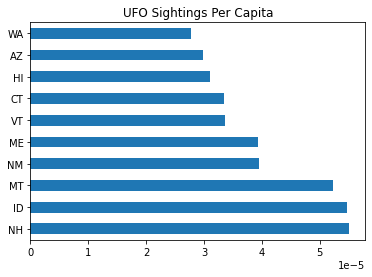

In [271]:
import matplotlib.pyplot as plt
df["ufos_per_cap"].sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("UFO Sightings Per Capita")

In [278]:
d = pd.concat([ufos.state.value_counts(), state_pops_2019], axis=1)

In [281]:
d["cap"] = d["state"] / d['POPESTIMATE2019']

<AxesSubplot:>

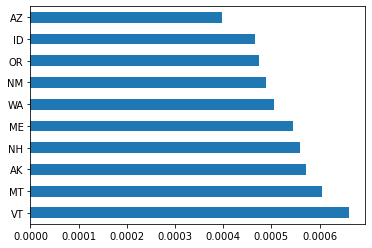

In [286]:
d.cap.sort_values(ascending=False).head(10).plot(kind="barh")

<AxesSubplot:>

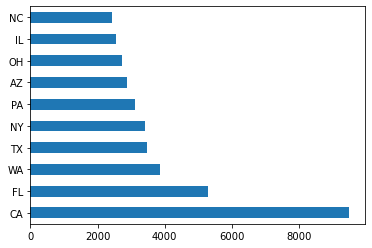

In [289]:
ufos.state.value_counts().head(10).plot(kind="barh")